In [17]:
from src.models.train_emos import train_emos, train_and_test_emos
from brier_score import brier_plot, brier_skill_plot
from src.models.get_data import get_tensors, get_normalized_tensor
from src.models.emos import EMOS

ImportError: cannot import name 'brier_skill_plot' from 'brier_score' (/usr/people/hakvoort/thesiscode/src/visualization/brier_score.py)

In [2]:
neighbourhood_size = 11
parameter_names = ['wind_speed', 'press', 'kinetic', 'humid', 'geopot']
ignore = ['229', '285', '323']
train_folds = [1, 2]
train_data = get_normalized_tensor(neighbourhood_size, parameter_names, train_folds, ignore)

X_train = train_data['X']
y_train = train_data['y']
variances_train = train_data['variances']
mean_train = train_data['mean']
std_train = train_data['std']


print(X_train.shape)

(15733, 5)


In [4]:
test_fold = 3

X_test, y_test, variances_test = get_tensors(neighbourhood_size, parameter_names, test_fold, ignore)
X_test = (X_test - mean_train) / std_train

print(X_test.shape)

(7780, 5)


In [5]:
setup = {}

setup["num_features"] = len(parameter_names)
setup["feature_mean"] = mean_train
setup["feature_std"] = std_train
setup["features"] = parameter_names
setup["neighbourhood_size"] = neighbourhood_size

Possible settings for EMOS class:

loss:

    loss_CRPS_sample
    loss_log_likelihood
    loss_Brier_score 
    loss_twCRPS_sample

in case sample is used loss: sample

chaining_functions

    chain_function_indicator 
        includes:
        
         threshold
    chain_function_normal_cdf
        includes: 
        
        chain_function_mean
         chain_function_std

optimizer:

    Adam
    SGD

learning_rate:
    -Positive real valued number

forecast_distribution:

    distr_trunc_normal
    distr_log_normal
    distr_gev(2/3)

    distr_mixture (which contains two of the above distributions)
    distr_mixture_linear

they must contain distribution_1/distribution_2

    


In [15]:
models_crps = {}
setup1 = setup

setup1["loss"] = "loss_CRPS_sample"
setup1["samples"] = 100
setup1["optimizer"] = "Adam"
setup1["learning_rate"] = 0.01
setup1["forecast_distribution"] = "distr_trunc_normal"

trunc_normal_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_log_normal"

log_normal_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_gev"
setup1["samples"] = 300

gev_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_gev2"

gev2_crps = EMOS(setup1)

setup1["forecast_distribution"] = "distr_gev3"

gev3_crps = EMOS(setup1)


models_crps["trunc_normal_crps"] = trunc_normal_crps
models_crps["log_normal_crps"] = log_normal_crps
models_crps["gev_crps"] = gev_crps
models_crps["gev2_crps"] = gev2_crps
models_crps["gev3_crps"] = gev3_crps

Using default parameters for truncated normal distribution
Using default parameters for log normal distribution
Using default parameters for Generalized Extreme Value distribution
Using default parameters for Generalized Extreme Value distribution 2
Using default parameters for Generalized Extreme Value distribution 3


In [16]:
epochs = 500

for model in models_crps:
    models_crps[model].fit(X_train, y_train, variances_train, epochs)

Step: 0, Loss: 1.6915428638458252
Step: 1, Loss: 1.6638262271881104
Step: 2, Loss: 1.6431360244750977
Step: 3, Loss: 1.6190475225448608
Step: 4, Loss: 1.6009337902069092
Step: 5, Loss: 1.5789989233016968
Step: 6, Loss: 1.5618631839752197
Step: 7, Loss: 1.5434913635253906
Step: 8, Loss: 1.5256328582763672
Step: 9, Loss: 1.512081503868103
Step: 10, Loss: 1.495106816291809
Step: 11, Loss: 1.4811674356460571
Step: 12, Loss: 1.470380425453186
Step: 13, Loss: 1.458040475845337
Step: 14, Loss: 1.4454883337020874
Step: 15, Loss: 1.4336292743682861
Step: 16, Loss: 1.4219497442245483
Step: 17, Loss: 1.4128551483154297
Step: 18, Loss: 1.4001286029815674
Step: 19, Loss: 1.38970947265625
Step: 20, Loss: 1.37860107421875
Step: 21, Loss: 1.3667492866516113
Step: 22, Loss: 1.3557112216949463
Step: 23, Loss: 1.3453161716461182
Step: 24, Loss: 1.3323020935058594
Step: 25, Loss: 1.3223164081573486
Step: 26, Loss: 1.3128893375396729
Step: 27, Loss: 1.3031203746795654
Step: 28, Loss: 1.293677806854248
Step

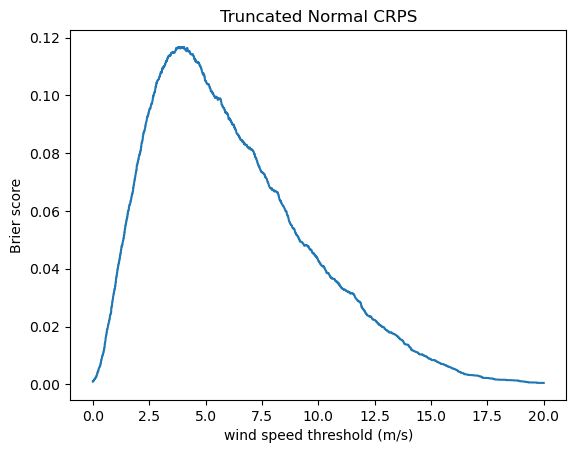

In [8]:
setup1["forecast_distribution"] = "mixture"
setup1["distribution_1"] = "distr_trunc_normal"
setup1["distribution_2"] = "distr_log_normal"

mixture_trunc_log_crps = EMOS(setup1)
mixture
